### Linear Regression

- One of the supervised learning methods, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
- A linear regression line has an equation of the form `Y = a + bX`, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).
- Linear regression focuses on the conditional probability distribution of the response given the values of the predictors.

### Objective

A simple marketing effectiveness model where we try to capture the impact of various marketing and promotional activities on volume sales

### Data Description

- Data captured over 2 years
- No. of obs = 104 – so we can compare 52 weeks v/s 52 weeks
- Target = NewVolSales
- Base Price = Price of a product without any promotion
- Radio/TV = captured trps
- InStore = % of stores having some in-store promotions happening per week
- Discount = % of discount offered on an average by stores each week
- Stockout = % of stores having products stock out in a week, which means that the customer is in the store but the product is missing
- Website Campaign = indicates the presence or absence of web promotional activities in a given week – so the column contains Web C, Twitter and Fb
- NewspaperInserts = indicates the presence of promotion using newspaper inserts in a given week


### Loading Data

In [1]:
import os
os.chdir('C:\\Users\\fabi\\Desktop\\DONO\\Manipal_Deloitte\\Linear Regression')

In [1]:
## Importing necessary libraries

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Reading the data
data = pd.read_csv("mktmix.csv")

In [3]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


### Data Cleaning & Exploration

In [4]:
## Number of rows & cols
data.shape

(104, 9)

In [5]:
## Descriptive statistics
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.00,104.00,100.00,104.00,104.00,104.00,104.00
mean,20171.07,15.31,256.69,32.92,0.02,141.01,2.55
std,1578.60,0.53,86.99,13.68,0.03,42.95,0.31
min,17431.00,13.74,0.00,10.78,0.00,37.66,1.82
25%,19048.75,15.03,235.00,22.18,0.00,117.11,2.32
50%,19943.50,15.33,278.50,31.16,0.00,138.58,2.50
75%,20942.75,15.64,313.25,41.08,0.05,175.68,2.81
max,24944.00,16.28,399.00,68.12,0.09,240.29,3.16


In [6]:
## Columns of the data loaded
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [7]:
## Types of data in each column
data.dtypes

NewVolSales            int64
Base_Price           float64
Radio                float64
InStore              float64
NewspaperInserts      object
Discount             float64
TV                   float64
Stout                float64
Website_Campaign      object
dtype: object

In [8]:
## Cleaning up the column names 
data.rename(columns={'Website_Campaign ':'Website_Campaign'}, inplace=True)
data.rename(columns={'Radio ':'Radio'}, inplace=True)
data.rename(columns={'TV ':"TV"}, inplace=True)

In [9]:
## Unique values of website_campaign
data['Website_Campaign'].unique()

array([nan, 'Facebook', 'Twitter', 'Website Campaign '], dtype=object)

In [10]:
## Cleaning up values of website_campaign col
data['Website_Campaign'] = np.where((data['Website_Campaign']=='Website Campaign '), 'Website_Campaign',
                                   data['Website_Campaign'])

In [11]:
data['Website_Campaign'].unique()

array([nan, 'Facebook', 'Twitter', 'Website_Campaign'], dtype=object)

###### Skewness

- Skewness is the degree of asymmetry observed in a probability distribution.
- Distributions can exhibit right (positive) skewness or left (negative) skewness to varying degrees. A normal distribution (bell curve) exhibits zero skewness.

###### Outliers
- Outliers are observations that lie far away from majority of observations in the dataset

In [12]:
## Closer look at the summary stats of the base price column
print(data["Base_Price"].describe())

count   104.00
mean     15.31
std       0.53
min      13.74
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64


Looking at the min, max and mean, there is a possibility of the data being negatively skewed. 

###### Histogram

- A histogram is a graphical representation that organizes a group of data points into user-specified ranges. 
- Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.
- When data are skewed, the majority of the data are located on one side of the histogram.

<AxesSubplot:ylabel='Frequency'>

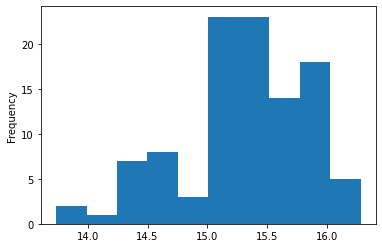

In [13]:
## Histogram of base_price
data.Base_Price.plot(kind='hist')

Long tail on the LHS indicating negative skewness

##### Boxplot

![alt text](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png "Title")

- A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
- It can give information on the outliers (if any) and what their values are. It may also help us understand if the data is symmetrical, how tightly the data is grouped, and if and how the data is skewed.

<AxesSubplot:>

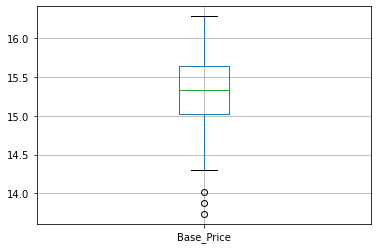

In [14]:
## Boxplot of base_price
data.boxplot(column='Base_Price')

We see extreme values and potential outliers on the lower tail

In [15]:
## Digging for potential outliers using quantiles
data['Base_Price'].quantile(np.arange(0,1,0.1))

0.00   13.74
0.10   14.59
0.20   14.97
0.30   15.03
0.40   15.18
0.50   15.33
0.60   15.49
0.70   15.64
0.80   15.80
0.90   15.96
Name: Base_Price, dtype: float64

In [16]:
q = data['Base_Price'].quantile(0.01)

In [17]:
print(q)

13.8779529113


In [18]:
data[data.Base_Price < q]

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
74,24468,13.74,251.00,37.84,NaN,0.05,135.15,2.66,NaN
76,21710,13.87,261.00,34.22,NaN,0.00,148.71,2.98,NaN


In [19]:
avg = data['Base_Price'].mean()

In [20]:
## Replacing outlier values with avg
data.loc[(data["Base_Price"]<q), 'Base_Price'] = avg

In [21]:
data['Base_Price'].describe()

count   104.00
mean     15.34
std       0.48
min      14.01
25%      15.03
50%      15.33
75%      15.64
max      16.28
Name: Base_Price, dtype: float64

In [22]:
data['NewVolSales'].describe()

count     104.00
mean    20171.07
std      1578.60
min     17431.00
25%     19048.75
50%     19943.50
75%     20942.75
max     24944.00
Name: NewVolSales, dtype: float64

This feature could exhibit positive skewness

<AxesSubplot:ylabel='Frequency'>

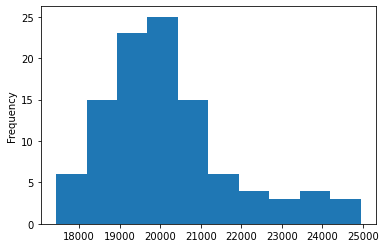

In [23]:
data.NewVolSales.plot(kind='hist')

We see a long right-tail which indicates a positive skewness.

In [24]:
data['Radio'].describe()

count   100.00
mean    256.69
std      86.99
min       0.00
25%     235.00
50%     278.50
75%     313.25
max     399.00
Name: Radio, dtype: float64

Distribution looks more or less fine but  there're only 100 observations, i.e., 4 missing values

###### Missing Value Treatment

- Detecting and handling missing values in the correct way is important as they can impact the results of the analysis, and there are ML algorithms that can’t handle them
- Common encodings for missing values are n/a, NA,  -99, -999, ?, the empty string, or any other placeholder
- When you open a new dataset, without instructions, you need to recognize if any such placeholders have been used to represent missing values

In [25]:
## Checking for number of missing values
data['Radio'].isnull().sum()

4

In [26]:
# Replace Missing values 
data['Radio'] = data['Radio'].fillna(data['Radio'].mean())

In [27]:
data['Radio'].describe()

count   104.00
mean    256.69
std      85.29
min       0.00
25%     235.75
50%     276.00
75%     312.25
max     399.00
Name: Radio, dtype: float64

In [28]:
data['Website_Campaign'].value_counts(dropna = False)

NaN                 90
Website_Campaign     6
Twitter              4
Facebook             4
Name: Website_Campaign, dtype: int64

90% of the data is missing due to some reasons unknown to us; will leave them as it is since it's a huge chunk of data and we cannot impute missing values with the conventional methods

In [29]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign'],
      dtype='object')

##### EDA/Visualization

Exploratory results give us an idea about what to expect from the model and also supplement the model findings

###### Scatter plot
- A scatter plot is a chart type that is normally used to observe and visually display the relationship between variables where the values of the variables are represented by dots. 
- The positioning of the dots on the vertical and horizontal axis will inform the value of the respective data point; hence, scatter plots make use of Cartesian coordinates to display the values of the variables in a data set.

<AxesSubplot:xlabel='NewVolSales', ylabel='Base_Price'>

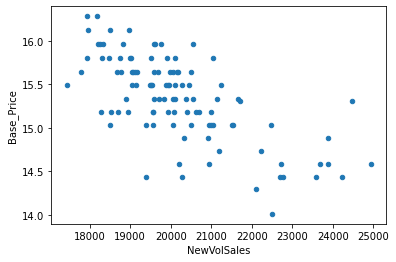

In [30]:
# Base Price
data.plot(x="NewVolSales",y="Base_Price",kind="scatter")

A negative relationship between the two is observed, which is also quite intuitive. As baseprices goes up, sales will decline and vice-versa.

<AxesSubplot:xlabel='NewVolSales', ylabel='Radio'>

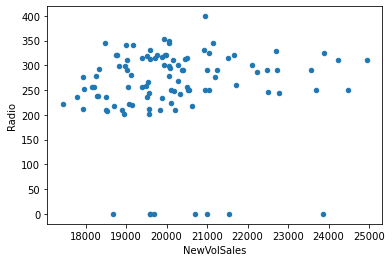

In [31]:
#Radio
data.plot(x="NewVolSales",y="Radio",kind="scatter")

No clear pattern observed – which means radio may not have a significant impact on sales

###### Correlation

- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). 
- It’s a common tool for describing simple relationships without making a statement about cause and effect.

In [32]:
## Correlation matrix of numerical features
pd.options.display.float_format = '{:.2f}'.format
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.00,-0.68,0.05,0.44,0.42,0.15,-0.38
Base_Price,-0.68,1.00,-0.00,-0.24,-0.20,0.07,0.02
Radio,0.05,-0.00,1.00,-0.02,0.11,-0.06,-0.19
InStore,0.44,-0.24,-0.02,1.00,0.72,-0.02,0.03
Discount,0.42,-0.20,0.11,0.72,1.00,0.12,-0.03
TV,0.15,0.07,-0.06,-0.02,0.12,1.00,-0.13
Stout,-0.38,0.02,-0.19,0.03,-0.03,-0.13,1.00


Strong correlation between instore and discount, which is intuitive bc both are activities within the store

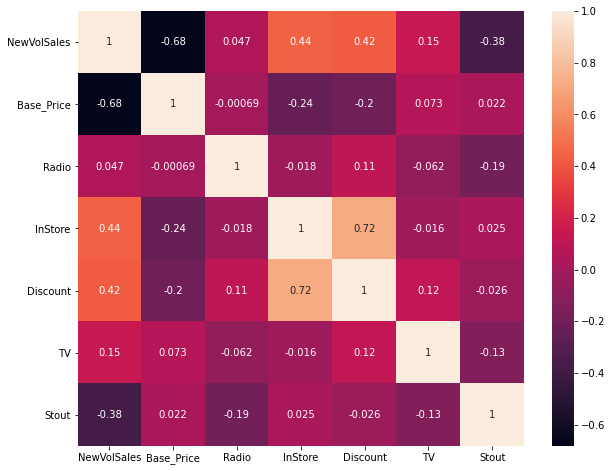

In [33]:
## Visualization of correlation matrix
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

Colourmap indicates the strength of correlation. 

##### Dummy Encoding

- Conversion of categorical variable(s) into dummy/indicator variables
- For each unique value in a column, a new column is created; the values in this column are represented as 1s and 0s, depending on whether the value matches the column header
- When extracting features from a dataset, it is often useful to transform categorical features into vectors so that you can do vector operations on them; hence, we make use of get_dummies method in pandas

In [34]:
data = pd.get_dummies(data, columns=['NewspaperInserts'])

In [35]:
data = pd.get_dummies(data, columns=['Website_Campaign'])

In [36]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website_Campaign
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,0,0,0,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,0,0,0,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,0,0,0,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,0,0,0,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,0,0,0,0


In [37]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'Discount', 'TV',
       'Stout', 'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website_Campaign'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NewVolSales                        104 non-null    int64  
 1   Base_Price                         104 non-null    float64
 2   Radio                              104 non-null    float64
 3   InStore                            104 non-null    float64
 4   Discount                           104 non-null    float64
 5   TV                                 104 non-null    float64
 6   Stout                              104 non-null    float64
 7   NewspaperInserts_Insert            104 non-null    uint8  
 8   Website_Campaign_Facebook          104 non-null    uint8  
 9   Website_Campaign_Twitter           104 non-null    uint8  
 10  Website_Campaign_Website_Campaign  104 non-null    uint8  
dtypes: float64(6), int64(1), uint8(4)
memory usage: 6.2 KB


In [39]:
## Segregating predictor and target variables
x = data.drop(['NewVolSales'], axis=1)
y = data['NewVolSales']

In [40]:
## Split the data into test and train

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=156)

### Building Linear Regression Model

`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 

In [41]:
import statsmodels.api as sm

## Adding constant term as we are using statsmodel
## By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept 
## Hence, you need to use the command 'add_constant' so that it also fits an intercept

xtrain1 = sm.add_constant(xtrain)
xtest1 = sm.add_constant(xtest)

A regression without a constant means that the regression line goes through the origin wherein the dependent variable and the independent variable is equal to zero. Many times, the intercept makes no sense.

For example, suppose we use the rain to predict the quantity of wheat produced. Practically, if there is no rain, there would be no production. So in this situation, the regression line crosses the y-axis somewhere else beside zero, and the intercept doesn’t make any sense. However, the intercept is important to calculate the predicted values especially in the industry like analytics and market research and it is advised not to cross it out completely from the analysis.

In [42]:
## Instantiating the model object
model1 = sm.OLS(ytrain,xtrain1)

In [43]:
## Fitting the model
results1 = model1.fit()

In [44]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     21.32
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           8.96e-18
Time:                        00:45:14   Log-Likelihood:                -674.64
No. Observations:                  83   AIC:                             1371.
Df Residuals:                      72   BIC:                             1398.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Let's take a glance at the different terms and measures charted out in the summary table.


- R-squared: Measures the proportion of variation in the dependent variable explained by the independent variable(s); sometimes addition of predictor variables increase the value of R-square, hence it becomes difficult to decide whether additional variables are adding to the predictability power of the regression.

- Adjusted R-squared: Modified version of R-squared which is adjusted for the number of variables in the regression; increases only when an additional variable adds to the explanatory power to the regression.

- AIC: Stands for Akaike’s Information Criteria and is used for model selection; penalizes the errors made in case a new variable is added to the regression equation; calculated as number of parameters minus the likelihood of the overall model; lower the AIC, better the model.

- BIC: Stands for Bayesian information criteria; a variant of AIC where penalties are made more severe.

- Prob(F-Statistic): Tells the overall significance of the regression; assess the significance level of all the variables together; the null hypothesis under this is “all the regression coefficients are equal to zero”; depicts the probability of null hypothesis being true.

- Prob(Omnibus): Omnibus test is performed in order to test the null hypothesis of OLS that the errors are normally distributed; Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption 

- Durbin-Watson: Measures the autocorrelation; Durbin-Watson statistic close to 2 implies absence of correlation.

- Prob(Jarque-Bera): Also performed for the distribution analysis of the regression errors; supposed to agree with the results of Omnibus test; a large value of JB test indicates that the errors are not normally distributed.

- Kurtosis: A statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution; determines the heaviness of the distribution tails; positive value indicates heavy-tails (i.e. a lot of data in the tails) while negative value means light-tails (i.e. little data in the tails).

- p-value: A measure of the probability that an observed difference could have occurred just by random chance; lower the p-value, greater the statistical significance of the observed difference; can be used as an alternative to or in addition to pre-selected confidence levels for hypothesis testing.

###### Interpretation

The Adj R2 is 71% - given the limited data we have, the value is pretty good. 

In this first run – newsppaper_insert, website_campaign_facebook, radio are statistically insigficant due to their large p-values. 

##### Backward Elimination

- A feature selection technique while building a machine learning model; used to remove those features that do not have a significant effect on the dependent variable or prediction of output

Following are the steps involved:
1. Select a threshold p-value (usually 0.05 or 5%)
2. Fit the complete model with all possible predictors/independent variables
3. Identify the predictor with the highest p-value
4. If the highest p-value is greater than the threshold, remove that particular predictor & fit the model with the remaining
5. Repeat steps 3-4 until all those predictors whose p-value > threshold is removed

In [45]:
## Remove factors with high p-value
xtrain2 = xtrain1.drop('NewspaperInserts_Insert', axis=1)
xtest2 = xtest1.drop('NewspaperInserts_Insert', axis=1)

In [46]:
## Fitting model post dropping features with high p-value
model2 = sm.OLS(ytrain,xtrain2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     24.01
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.77e-18
Time:                        00:46:02   Log-Likelihood:                -674.64
No. Observations:                  83   AIC:                             1369.
Df Residuals:                      73   BIC:                             1393.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Adjusted R-squared has improved slightly now

In [47]:
## Remove factors with high p-value
xtrain3 = xtrain2.drop('Website_Campaign_Facebook', axis=1)
xtest3 = xtest2.drop('Website_Campaign_Facebook', axis=1)

In [48]:
model3 = sm.OLS(ytrain,xtrain3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     27.29
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           3.57e-19
Time:                        00:46:09   Log-Likelihood:                -674.75
No. Observations:                  83   AIC:                             1368.
Df Residuals:                      74   BIC:                             1389.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [49]:
## Remove factors with high p-value
xtrain4 = xtrain3.drop('Radio', axis=1)
xtest4 = xtest3.drop('Radio', axis=1)

In [50]:
model4 = sm.OLS(ytrain,xtrain4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     31.26
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           8.18e-20
Time:                        00:46:16   Log-Likelihood:                -675.09
No. Observations:                  83   AIC:                             1366.
Df Residuals:                      75   BIC:                             1386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [51]:
## Remove factors with high p-value
xtrain5 = xtrain4.drop('Website_Campaign_Twitter', axis=1)
xtest5 = xtest4.drop('Website_Campaign_Twitter', axis=1)

In [52]:
## Fitting the model on updated set of variables
model5 = sm.OLS(ytrain,xtrain5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     36.57
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.72e-20
Time:                        00:46:23   Log-Likelihood:                -675.42
No. Observations:                  83   AIC:                             1365.
Df Residuals:                      76   BIC:                             1382.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [53]:
## Remove factors with high p-value
xtrain6 = xtrain5.drop('Discount', axis=1)
xtest6 = xtest5.drop('Discount', axis=1)

In [54]:
model6 = sm.OLS(ytrain,xtrain6)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     43.36
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.95e-21
Time:                        00:46:27   Log-Likelihood:                -676.19
No. Observations:                  83   AIC:                             1364.
Df Residuals:                      77   BIC:                             1379.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Elimination of 'Discount' feature has reduced both normal and adjusted R-squared values, hence 'Discount' is a statistically significant predictor in our model**

In [55]:
## Remove factors with high p-value
xtrain7 = xtrain6.drop('TV', axis=1)
xtest7 = xtest6.drop('TV', axis=1)

In [56]:
model7 = sm.OLS(ytrain,xtrain7)
results7 = model7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     51.97
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.95e-21
Time:                        00:46:48   Log-Likelihood:                -677.86
No. Observations:                  83   AIC:                             1366.
Df Residuals:                      78   BIC:                             1378.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

**Similar to the previous case, dropping 'TV' from the predictors list caused both the R-squared values to fall even further. Therefore, this feature is significant as well**

Proceeding with `model5 ~ results5` for further evaluation

#### Evaluation Metrics

- `MSE(Mean squared error)`: tells you how close a regression line is to a set of points; does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

- `RMSE (Root mean squared error)`: the standard deviation of the residuals (prediction errors); RMSE is a measure of how spread out these residuals are

- `MAE (Mean Absolute Error)`: measures the average magnitude of the errors in a set of forecasts, without considering their direction

- `R-squared (R2)`: a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
predictions = results5.predict(xtest5)

In [59]:
actuals = ytest

In [60]:
## Mean Absolute error
mae = mean_absolute_error(actuals,predictions)
mae

423.23375336528954

In [61]:
## Mean squared error
mse = mean_squared_error(actuals,predictions)
mse

330962.2829490623

In [62]:
## Root mean squared error
rmse = mean_squared_error(actuals,predictions,squared=False)
rmse

575.293214760145

In [63]:
## R-squared
r2 = r2_score(actuals,predictions)
r2

0.8043103423686543

In [64]:
## MAPE - the sum of the individual absolute errors divided by the demand
## It is the average of the percentage errors
## The lower the value for MAPE, the better a model is able to predict values

mape = np.mean(abs((actuals - predictions)/actuals)) 
mape

0.021150782018738493

#### Inference

R-squared is 80.4% which is fairly good for the data in question. Also, the error metric values are not too huge which is a good sign.

MAPE shows only 2% which is way below 10% and hence within an acceptable range.

### Assumption Of Linear Regression


#### 1. Linearity
This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.


#### Why it can happen:
There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

#### How will it affect: 
The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

#### How to detect it: 
If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.


#### How to fix it: 
Either adding polynomial terms to some of the predictors or applying nonlinear transformations. If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

In [65]:
# Create predictions on the features with the model and calculates residuals

predictions = results5.predict(xtrain5)
df_results = pd.DataFrame({'Actual': ytrain, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
df_results

,Actual,Predicted,Residuals
41,18977,19343.73,-366.73
78,23677,22909.21,767.79
98,19126,19468.49,-342.49
31,21034,20717.00,317.00
29,21507,21282.82,224.18
...,...,...,...
43,19980,20619.12,-639.12
63,19756,20376.54,-620.54
34,19696,19733.44,-37.44
76,21710,19671.06,2038.94


`seaborn.lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)`

- lmplot plots data and regression model fits across a FacetGrid.
- This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

**Parameters**
- x, y: strings, optional
  
  Input variables; these should be column names in data.

- data: DataFrame
  
  Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

- hue,col,row: strings
  
  Variables that define subsets of the data, which will be drawn on separate facets in the grid. 

- palette: palette name, list, or dict
  
  Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

- col_wrap: int
  
  “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

- height: scalar
  
  Height (in inches) of each facet.

- aspect: scalar
  
  Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

- markers: matplotlib marker code or list of marker codes, optional
  
  Markers for the scatterplot. If a list, each marker in the list will be used for each level of the hue variable.

- share{x,y}: bool, ‘col’, or ‘row’ optional
  
  If true, the facets will share y axes across columns and/or x axes across rows.

- {hue,col,row}_order: lists, optional
  
  Order for the levels of the faceting variables. By default, this will be the order that the levels appear in data or, if the variables are pandas categoricals, the category order.

- legend: bool, optional
  
  If True and there is a hue variable, add a legend.

- legend_out: bool
  
  If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

- x_estimator: callable that maps vector -> scalar, optional
  
  Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.

- x_bins: int or vector, optional
  
  Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.

- x_ci: “ci”, “sd”, int in [0, 100] or None, optional
  
  Size of the confidence interval used when plotting a central tendency for discrete values of x. If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

- scatter: bool, optional

  If True, draw a scatterplot with the underlying observations (or the x_estimator values).

- fit_reg: bool, optional
  
  If True, estimate and plot a regression model relating the x and y variables.

- ci: int in [0, 100] or None, optional

  Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

- n_boot: int, optional
  
  Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

- units: variable name in data, optional

  If the x and y observations are nested within sampling units, those can be specified here. This will be taken into account when computing the confidence intervals by performing a multilevel bootstrap that resamples both units and observations (within unit). This does not otherwise influence how the regression is estimated or drawn.

- seed: int, numpy.random.Generator, or numpy.random.RandomState, optional

  Seed or random number generator for reproducible bootstrapping.

- order: int, optional

  If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

- logistic: bool, optional

  If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

- lowess: bool, optional

  If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.

- robust: bool, optional

  If True, use statsmodels to estimate a robust regression. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

- logx: bool, optional

  If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that x must be positive for this to work.

- {x,y}_partial: strings in data or matrices

  Confounding variables to regress out of the x or y variables before plotting.

- truncate: bool, optional

  If True, the regression line is bounded by the data limits. If False, it extends to the x axis limits.

- {x,y}_jitter: floats, optional

  Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

- {scatter,line}_kws: dictionaries

  Additional keyword arguments to pass to plt.scatter and plt.plot.

- facet_kws: dict

  Dictionary of keyword arguments for FacetGrid.

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


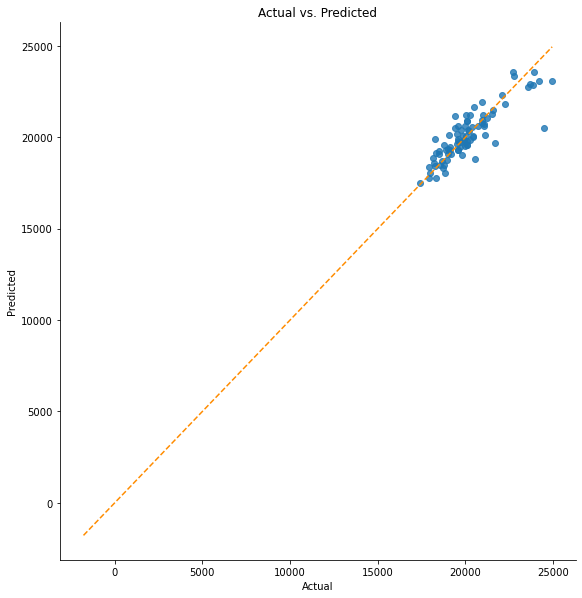

In [66]:
print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
print('Checking with a scatter plot of actual vs. predicted.',
      'Predictions should follow the diagonal line.')

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=8)
        
# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

- We can see a relatively even spread around the diagonal line
- We may conclude that linearity assumption is satisfied

#### 2. Normality of the Error Terms
More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

#### Why it can happen: 
This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.

#### How will it affect:
A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

#### How to detect it: 
There are various ways to do so, but Q-Q plot is the simplest of all.

#### How to fix it:
It depends on the root cause, but there are a few options. Nonlinear transformations of the variables, excluding specific variables (such as long-tailed variables), or removing outliers may solve this problem.

###### Q-Q Plot
- Q-Q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.
- Using this plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line.
- Absence of normality in the errors can be seen with deviation in the straight line.

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/quantile.png "Normal vs Not Normal QQ")

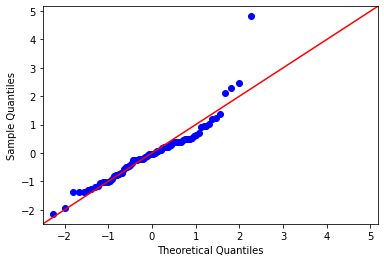

In [67]:
# Getting Residuals 
res = results5.resid

# Checking for normality of error
fig = sm.qqplot(res, fit=True, line='45')
plt.show()

The residuals appear to be normally distributed from the q-q plot

### 3. No Multicollinearity Among Predictors
This assumes that the predictors used in the regression are not correlated with each other. This won’t render our model unusable if violated, but it will cause issues with the interpretability of the model.

#### Why it may happen: 
A lot of data is just naturally correlated. Features normally have some level of correlation with each other.

#### How will it affect:
Multicollinearity causes issues with the interpretation of the coefficients. Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.” This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant. Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.

#### How to detect it:
We will examine the variance inflation factor (VIF).

#### How to fix it: 
This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.

#### Multicollinearity Check

- Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model; that is an independent variable can be predicted from another independent variable in a regression model.
- Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.
- Multicollinearity may not affect the accuracy of the model as much, but we may lose reliability while determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.


**patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices**

For calculating vif, we’ll have to create an X matrix and a y matrix so we create a dmatrices() and fitting the model into it.

X matrix with all the features + intercept


In [69]:
#pip install patsy

In [68]:
from patsy import dmatrices

In [69]:
Y, X = dmatrices('NewVolSales~Base_Price+InStore+TV+Discount+Stout+Website_Campaign_Website_Campaign',
                 data=data, return_type='dataframe')

In [70]:
X.head()

,Intercept,Base_Price,InStore,TV,Discount,Stout,Website_Campaign_Website_Campaign
0,1.00,15.03,15.45,101.78,0.00,2.28,0.00
1,1.00,15.03,16.39,76.73,0.00,2.22,0.00
2,1.00,14.59,62.69,131.59,0.05,2.01,0.00
3,1.00,15.33,16.57,119.63,0.00,2.20,0.00
4,1.00,15.64,41.50,103.44,0.04,1.82,0.00


In [71]:
Y.head()

,NewVolSales
0,19564.00
1,19387.00
2,23889.00
3,20055.00
4,20064.00


#### Variance Inflation Factor (VIF)

- VIF is a measure of the amount of multicollinearity in a set of multiple regression variables. 
- Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. 
- A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [72]:
## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [74]:
vif.round(1)

,VIF Factor,features
0,1173.80,Intercept
1,1.10,Base_Price
2,2.20,InStore
3,1.10,TV
4,2.20,Discount
5,1.10,Stout
6,1.20,Website_Campaign_Website_Campaign


- InStore and Discount are slightly correlated but within the tolerable VIF range of 5 since VIF between two factors should be <5.
- Same goes for Base_Price, TV and Stout.

### 4. No Autocorrelation of the Error Terms
The presence of correlation in error terms drastically reduces model’s accuracy. This usually occurs in time series models where the next instant is dependent on previous instant. If the error terms are correlated, the estimated standard errors tend to underestimate the true standard error.

If this happens, it causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.

#### Why it may happen: 
In a time series scenario, there could be information about the past that we aren’t capturing. In a non-time series scenario, our model could be systematically biased by either under or over predicting in certain conditions. Lastly, this could be a result of a violation of the linearity assumption.

#### How will it affect: 
Will impact our model estimates.

#### How to detect it: 
We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Durbin–Watson (DW) statistic must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 
2 < DW < 4 indicates negative autocorrelation.

Alternatively, you could create residual vs time plot and look for the seasonal or correlated pattern in residual values.

#### How to fix it: 
A simple fix of adding lag variables can fix this problem. Alternatively, interaction terms, additional variables, or additional transformations may fix this.

In [75]:
from statsmodels.stats.stattools import durbin_watson

print('Assumption 4: No Autocorrelation', '\n')
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.1563762411030076
Little to no autocorrelation 

Assumption satisfied


### 5. Homoscedasticity
Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. Linear regression assumes homoscedasticity, which is the same variance within our error terms.

Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.

#### Why it can happen: 
Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.

#### How will it affect: 
Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

#### How to detect it: 
Plot the residuals and see if the variance appears to be uniform.
### How to fix it: 
Heteroscedasticity can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

![alt text](https://miro.medium.com/max/875/1*Jan9oVOzNqQyhA4bSg_zwA.png "Homo vs heteroscedasticity")

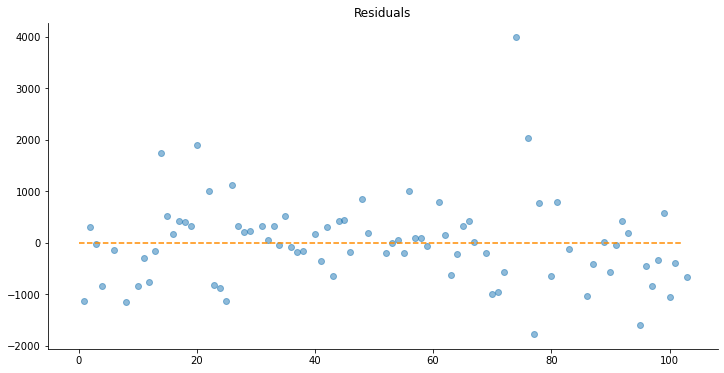

In [76]:
# Plotting the residuals

plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

No discernible pattern detected in the residuals plot. Hence, homoscedasticity assumption satisfied

In [77]:
## Building model using sklearn
from sklearn.linear_model import LinearRegression

In [78]:
linear_reg = LinearRegression().fit(xtrain5,ytrain)

In [79]:
linreg_pred = linear_reg.predict(xtest5)

In [80]:
linear_reg.coef_

array([ 0.00000000e+00, -2.08093157e+03,  2.88556663e+01,  6.18177295e+03,
        3.60259744e+00, -1.39142157e+03, -1.44301400e+03])

In [81]:
linear_reg.intercept_

54143.60220300048

In [82]:
lr_mae = mean_absolute_error(ytest, linreg_pred)
lr_mae

423.2337533652717

In [83]:
lr_mse = mean_squared_error(ytest, linreg_pred)
lr_mse

330962.2829490436

In [84]:
lr_rmse = mean_squared_error(ytest, linreg_pred, squared=False)
lr_rmse

575.2932147601288

In [85]:
lr_r2 = r2_score(ytest, linreg_pred)
lr_r2

0.8043103423686653

### Gradient Descent Algorithm 

#### Cost Function
It is a function that measures the performance of a model for any given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.

After making a hypothesis with initial parameters, we calculate the Cost function. And with a goal to reduce the cost function, we modify the parameters by using the Gradient descent algorithm over the given data.
![alt text](https://editor.analyticsvidhya.com/uploads/90857Screenshot%20(41)_LI.jpg "Cost function")

#### Gradient Descent
Gradient descent is an iterative optimization algorithm for finding the local minimum of a function.

To find the local minimum of a function using gradient descent, we must take steps proportional to the negative of the gradient (move away from the gradient) of the function at the current point. If we take steps proportional to the positive of the gradient (moving towards the gradient), we will approach a local maximum of the function, and the procedure is called Gradient Ascent.

Gradient descent was originally proposed by CAUCHY in 1847. It is also known as steepest descent.
![alt text](https://editor.analyticsvidhya.com/uploads/631731_P7z2BKhd0R-9uyn9ThDasA.png "Gradient descent")

The goal of the gradient descent algorithm is to minimize the given function (say cost function). To achieve this goal, it performs two steps iteratively:
   1. Compute the gradient (slope), the first order derivative of the function at that point
   2. Make a step (move) in the direction opposite to the gradient, opposite direction of slope increase from the current point by alpha times the gradient at that point
![alt text](https://editor.analyticsvidhya.com/uploads/36152Screenshot%20(43).png "Gradient descent formula")

#### Alpha – The Learning Rate
Alpha is called Learning rate – a tuning parameter in the optimization process. It decides the length of the steps.

We have the direction we want to move in, now we must decide the size of the step we must take. It must be chosen carefully to end up with local minima.

If the learning rate is too high, we might OVERSHOOT the minima and keep bouncing, without reaching the minima.
If the learning rate is too small, the training might turn out to be too long.
![alt text](https://editor.analyticsvidhya.com/uploads/43266images.png "Alpha")

a) Learning rate is optimal, model converges to the minimum
b) Learning rate is too small, it takes more time but converges to the minimum
c) Learning rate is higher than the optimal value, it overshoots but converges ( 1/C < η <2/C)
d) Learning rate is very large, it overshoots and diverges, moves away from the minima, performance decreases on learning

![alt text](https://editor.analyticsvidhya.com/uploads/40982epochss.png "Learning Rate")

`Note: As the gradient decreases while moving towards the local minima, the size of the step decreases. So, the learning rate (alpha) can be constant over the optimization and need not be varied iteratively.`

#### Local Minima
The cost function may consist of many minimum points. The gradient may settle on any one of the minima, which depends on the initial point (i.e initial parameters(theta)) and the learning rate. Therefore, the optimization may converge to different points with different starting points and learning rate.
![alt text](https://editor.analyticsvidhya.com/uploads/90062gdopt.gif "Local minima")

The above gif shows convergence of cost function with different starting points

Gradient descent is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible, so here we will use it to optimize the weight and bias for different regression coefficient.

In [86]:
# Random Initialization of the weight and bias

import random
def initialize(dim):
    # dim - is the number of weights to be initialized beside the bias
    # for reproducible result, the seed is to set to 42
    np.random.seed(seed=42)
    random.seed(42)
    # initialize bias
    b = np.random.random()
    # intialize the weights
    w = np.random.rand(dim)
    
    return b,w

In [87]:
# Function to get prediction of all input given bias and weight

def Predict_Y(b,w,X):
    # matrix multiplication of weight with input variable
    return b + np.matmul(X,w)

##### Calculate the cost function
1. Calculating the difference between the estimated Y and actual Y.
2. Calculating the square of the above residuals and sum over all records.
3. Divide it with the number of observations.

In [88]:
# Y is actual value of y.
# Y_hat is predicted value of y.

def get_cost(Y,Y_hat):
    # calculate the residual- difference between actual and predicted value
    Y_resid = Y-Y_hat
    # matrix multiplcation with self will give square values then take the sum and divide by number of examples
    # to calculate mean
    
    return np.sum(np.matmul(Y_resid.T,Y_resid))/ len(Y_resid)

##### Updating the Weight and Bias.
- x,y: the input and output variable
- y_hat: predicted value with current bias and weights
- b_0,w_0: current bias and weights
- learning_rate: learning rate to adjust the update and step

In [89]:
def update_beta(x,y,y_hat,b_0,w_0, learning_rate):
    
    # gradient of bias
    db = (np.sum(y_hat-y)*2)/len(y)
    # gradient of weights
    dw = (np.dot((y_hat-y),x)*2)/len(y)
    # update bias
    b_1 = b_0- learning_rate *db
    # update beta
    w_1 = w_0- learning_rate *dw
    
    # return the new bias and beta values
    return b_1,w_1

In [90]:
# Function to find the optimal bias and weights

def run_gradient_descent(X,Y,alpha=0.01,num_iterations=100):
    
    # Initialize the bias and weights
    b,w = initialize(X.shape[1])
    iter_num=0
    
    # Iteration_df keeps track of the cost after every 10 iterations
    iteration_df = pd.DataFrame(columns=['iteration','cost'])
    result_idx = 0
    
    # Run the iterations in loop
    for iter in range(num_iterations):
        # calculate predicted value of y
        Y_hat = Predict_Y(b,w,X)
        # calculate the cost
        this_cost = get_cost(Y,Y_hat)
        # save the previous bias and weights
        prev_b = b
        prev_w = w
        # update and calculate the new values of bias and weights
        b,w = update_beta(X,Y,Y_hat,prev_b,prev_w,alpha)
        
        # For every 10 iterations, store the cost
        if(iter_num %10 ==0):
            iteration_df.loc[result_idx] = [iter_num,this_cost]
            result_idx +=1
        
        iter_num +=1
        
        
        #print('Final estimate of b and w: ', b,w )
        #return the final bias, weights and the cost at the end
        
    return iteration_df,b,w

In [91]:
# Running the gradient descent algorithm at learning rate 0.01
df,b,w = run_gradient_descent(x, y, alpha=0.01, num_iterations=200)

<ipython-input-89-b59f06a83a57>:6: RuntimeWarning: overflow encountered in multiply
  dw = (np.dot((y_hat-y),x)*2)/len(y)


In [92]:
# Running the gradient descent algorithm at learning rate 0.001
df1,b,w = run_gradient_descent(x, y, alpha=0.001, num_iterations=200)

<ipython-input-89-b59f06a83a57>:6: RuntimeWarning: overflow encountered in multiply
  dw = (np.dot((y_hat-y),x)*2)/len(y)


Text(0.5, 0, 'Number of Iterations')

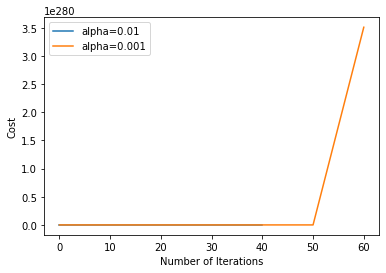

In [93]:
# Comparison of gradient descent model with different learning parameters

plt.plot(df['iteration'], df['cost'], label='alpha=0.01')
plt.plot(df1['iteration'], df1['cost'], label='alpha=0.001')
plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

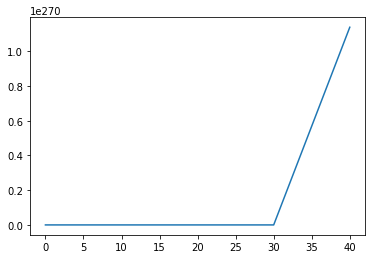

In [94]:
plt.plot(df['iteration'], df['cost'], label='alpha=0.01')

Gradient descent algorithm is not suitable for our modeling purposes since the cost function spikes up sharply after a couple of iterations regardless of the learning rate.

### Stochastic Gradient Descent (SGD) Regressor
The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration.

In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. `In typical Gradient Descent optimization, the batch is taken to be the whole dataset.` Although, using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, but the problem arises when our datasets get big. 

Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima are reached. Hence, it becomes computationally very expensive to perform.
This problem is solved by Stochastic Gradient Descent. `SGD uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.`

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with a significantly shorter training time

In [95]:
# Creating model object
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()

In [96]:
# Fitting train data
sgdr.fit(xtrain,ytrain)

SGDRegressor()

In [97]:
sgdr.coef_

array([-4.62586679e+10,  2.33374648e+11, -3.60336358e+11,  2.52204029e+08,
       -4.40113168e+10, -4.73553628e+09,  2.16164022e+10, -1.33995351e+09,
        1.68235905e+10,  2.91845588e+10])

In [98]:
sgdr.intercept_

array([4.27981843e+08])

In [99]:
# Prediction using sgd
sgd_pred = sgdr.predict(xtest)

In [100]:
# Evaluation using mae
sgd_mae = mean_absolute_error(ytest,sgd_pred)
sgd_mae

44159689473153.586

In [101]:
# MSE
sgd_mse = mean_squared_error(ytest,sgd_pred)
sgd_mse

2.0284309383348023e+27

In [102]:
# RMSE
sgd_rmse = mean_squared_error(ytest,sgd_pred,squared=False)
sgd_rmse

45038105403478.086

SGD regressor is not giving out predictions accurately for the dataset in question in comparison to linear regression

### Regularization in ML

***Why Regularization?***

Sometimes our Machine learning model performs well on the training data but does not perform well on the unseen or test data. It means the model is not able to predict the output or target column for the unseen data by introducing noise in the output, and hence the model is called an overfitted model.

Noise implies those data points in the dataset which don’t really represent the true properties of your data, but only due to a random chance.

So, to deal with the problem of overfitting we take the help of regularization techniques.

***What is Regularization?***

👉 It is one of the most important concepts of machine learning. This technique prevents the model from overfitting by adding extra information to it.

👉 It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique forces us not to learn a more complex or flexible model, to avoid the problem of overfitting.

👉 “How flexibility of a model is represented?”
    For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated from the regression line.

👉 In simple words, “In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same  number of variables”. It maintains accuracy as well as a generalization of the model.

***How does Regularization Work?***

Regularization works by adding a penalty or complexity term or shrinkage term with Residual Sum of Squares (RSS) to the complex model.

Let’s consider the Simple linear regression equation:

Here Y represents the dependent feature or response which is the learned relation. Then, Y is approximated to β0 + β1X1 + β2X2 + …+ βpXp

Here, X1, X2, …Xp are the independent features or predictors for Y, and β0, β1,…..βn represents the coefficients estimates for different variables or predictors(X), which describes the weights or magnitude attached to the features, respectively.

In simple linear regression, our optimization function or loss function is known as the residual sum of squares (RSS).
We choose those set of coefficients, such that the following loss function is minimized:
![alt text](https://miro.medium.com/max/908/1*DY3-IaGcHjjLg7oYXx1O3A.png "RSS")

Now this will adjust the coefficient estimates based on the training data. If there is noise present in the training data, then the estimated coefficients won’t generalize well and are not able to predict the future data.

This is where regularization comes into the picture, which shrinks or regularizes these learned estimates towards zero, by adding a loss function with optimizing parameters to make a model that can predict the accurate value of Y.

***Types of Regularization**

Mainly, there are two types of regularization techniques:
1. Ridge Regression
2. Lasso Regression

**`Ridge Regression`**
 
👉 Ridge regression is a kind of linear regression in which we introduce a small amount of bias, known as Ridge regression penalty so that we can get better long-term predictions.

👉 In Statistics, it is known as the L-2 norm.

👉 In this technique, the cost function is altered by adding the penalty term (shrinkage term), which multiplies the lambda with the squared weight of each individual feature. Therefore, the optimization function(cost function) becomes:
![alt text](https://miro.medium.com/max/1106/1*CiqZ8lhwxi5c4d1nV24w4g.png "L2")

In the above equation, the penalty term regularizes the coefficients of the model, and hence ridge regression reduces the magnitudes of the coefficients that help to decrease the complexity of the model.

In [103]:
# Instantiating model object
from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [104]:
# Fitting model
ridge_reg.fit(xtrain,ytrain)

Ridge()

In [105]:
ridge_reg.coef_

array([-2.00247008e+03, -4.22683791e-01,  3.83440097e+01,  2.09525169e+02,
        3.86680935e+00, -1.30363431e+03,  4.83287909e+01,  1.45986578e+02,
        3.23250889e+02, -1.28868072e+03])

In [106]:
ridge_reg.intercept_

52568.16382965696

In [107]:
# Prediction on unseen data
ridge_pred = ridge_reg.predict(xtest)

In [108]:
# MAE
ridge_mae = mean_absolute_error(ytest,ridge_pred)
ridge_mae

420.8571086200872

In [109]:
# MSE
ridge_mse = mean_squared_error(ytest,ridge_pred)
ridge_mse

311451.2875867586

In [110]:
# RMSE
ridge_rmse = mean_squared_error(ytest,ridge_pred,squared=False)
ridge_rmse

558.07820920258

In [111]:
# Exploring the alpha parameter --> lambda
ridge_reg.alpha

1.0

alpha = 1.0 is the default value.

Let's play around with different alpha values to identify which gives optimum performance.

In [136]:
from sklearn.model_selection import cross_val_score
# alpha_space = [0.001,0.1,1,5,10]
alpha_space = [10,20,30,50,100]
ridge_scores = []
for alpha in alpha_space:
    val = np.mean(cross_val_score(Ridge(alpha=alpha), xtrain, ytrain, cv = 5))
    ridge_scores.append(val)

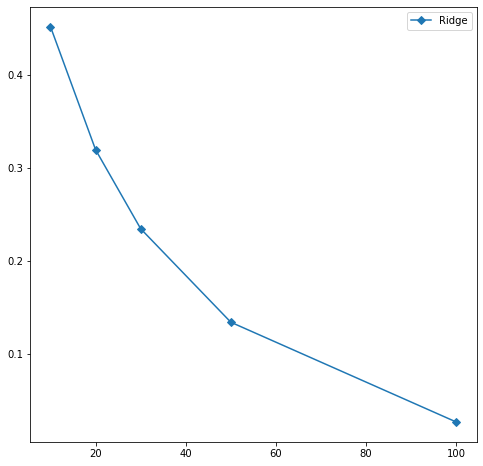

In [137]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.legend()
plt.show()

**`Lasso Regression`**

👉 Lasso regression is another variant of the regularization technique used to reduce the complexity of the model. It stands for Least Absolute and Selection Operator.

👉 It is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights. Therefore, the optimization function becomes:
![alt text](https://miro.medium.com/max/1094/1*tHJ4sSPYV0bDr8xxEdiwXA.png "L1")

👉 In statistics, it is known as the L-1 norm.

👉 In this technique, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter λ is sufficiently large. Therefore, the lasso method also performs feature selection and is said to yield sparse models.

In [114]:
# Instantiating model object
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [115]:
# Fitting the train data
lasso_reg.fit(xtrain,ytrain)

Lasso()

In [116]:
lasso_reg.coef_

array([-2.09207326e+03, -7.42125650e-01,  3.23708512e+01,  4.03962066e+03,
        3.11117528e+00, -1.40202890e+03,  2.10206251e+01,  1.97332292e+02,
        4.16224908e+02, -1.48003815e+03])

In [117]:
lasso_reg.intercept_

54508.32126157908

In [118]:
# Prediction on unseen data
lasso_pred = lasso_reg.predict(xtest)

In [119]:
# MAE
lasso_mae = mean_absolute_error(ytest,lasso_pred)
lasso_mae

424.00933998643313

In [120]:
# MSE
lasso_mse = mean_squared_error(ytest,lasso_pred)
lasso_mse

322574.07516131597

In [121]:
# RMSE
lasso_rmse = mean_squared_error(ytest,lasso_pred,squared=False)
lasso_rmse

567.9560503782982

In [122]:
# Tweaking alpha values to determine optimum performing model
lasso_scores = []
for alpha in alpha_space:
    val = np.mean(cross_val_score(Lasso(alpha=alpha), xtrain, ytrain, cv = 10))
    lasso_scores.append(val)

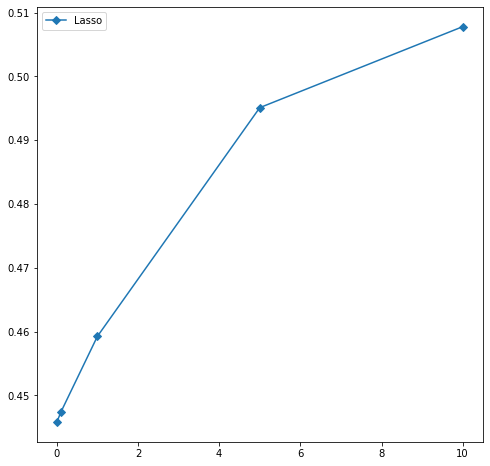

In [123]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

**`Key Differences between Ridge and Lasso Regression`**

👉 Ridge regression helps us to reduce only the overfitting in the model while keeping all the features present in the model. It reduces the complexity of the model by shrinking the coefficients whereas Lasso regression helps in reducing the problem of overfitting in the model as well as automatic feature selection.

👉 Lasso Regression tends to make coefficients to absolute zero whereas Ridge regression never sets the value of coefficient to absolute zero.

#### Elastic Net Regression
- The elastic net algorithm uses a weighted combination of L1 and L2 regularization. 
- A hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties. Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and one minus the alpha value is used to weight the L2 penalty.
- elastic_net_penalty = (alpha * l1_penalty) + ((1 – alpha) * l2_penalty)

For example, an alpha of 0.5 would provide a 50 percent contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

- The benefit is that elastic net allows a balance of both penalties, which can result in better performance than a model with either one or the other penalty on some problems.
- Another hyperparameter is provided called “lambda” that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambada, such as 1e-3 or smaller, are common.
- elastic_net_loss = loss + (lambda * elastic_net_penalty)

In [124]:
from sklearn.linear_model import ElasticNet

In [125]:
# Instantiating model object
enet = ElasticNet()

In [126]:
# Fitting the train data
enet.fit(xtrain,ytrain)

ElasticNet()

In [127]:
enet.coef_

array([-643.3919268 ,    0.69368872,   47.27531368,    8.8288902 ,
          6.12787664, -296.23849656,   -5.65247158,  -34.82674879,
         48.38422787, -174.55131376])

In [128]:
enet.intercept_

28154.79150766311

In [129]:
# Prediction on unseen data
enet_pred = enet.predict(xtest)

In [130]:
# MAE
enet_mae = mean_absolute_error(ytest,enet_pred)
enet_mae

701.0418378765268

In [131]:
# MSE
enet_mse = mean_squared_error(ytest,enet_pred)
enet_mse

760881.2466372867

In [132]:
# RMSE
enet_rmse = mean_squared_error(ytest,enet_pred,squared=False)
enet_rmse

872.2850718872166

In [133]:
# Tuning l1 ratio parameter
l1_ratio = [0,0.01,0.1,1]
Elasticnet_scores = []
for l1 in l1_ratio:
    val = np.mean(cross_val_score(ElasticNet(l1_ratio=l1), xtrain, ytrain, cv = 10))
    Elasticnet_scores.append(val)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67015917.056982845, tolerance: 19378.867205405408
  model = cd_fast.enet_coordinate_descent(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69840393.84559841, tolerance: 19711.479855405407
  model = cd_fast.enet_coordinate_descent(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69091269.88354036, tolerance: 20849.65415135135
  model = cd_fast.enet_coordinate_descent(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

In [134]:
l1_ratio

[0, 0.01, 0.1, 1]

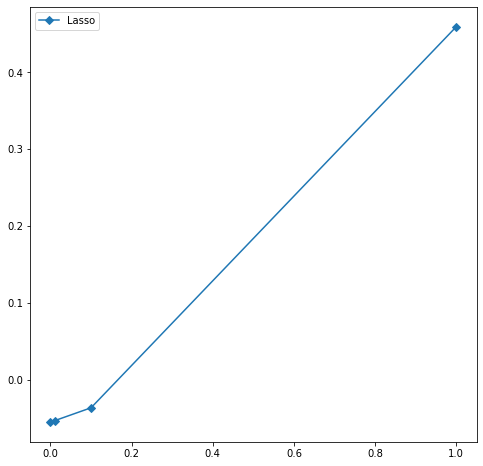

In [135]:
plt.figure(figsize=(8, 8))
plt.plot(l1_ratio, Elasticnet_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

In [145]:
### end of notebook